In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

In [67]:
# reading the excel into a DataFrame
df_crowdfunding = pd.read_excel('Crowdfunding campaign.xlsx')
df_crowdfunding

FileNotFoundError: [Errno 2] No such file or directory: 'Crowdfunding campaign.xlsx'

In [68]:
# analysing the data
df_crowdfunding.describe()

,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus,delivery
count,224.000000,224.000000,224.000000,224.000000,224.000000,219.000000,224.000000,221.000000,53.000000
mean,0.491071,17412.232143,1.749669,0.459821,0.415179,0.214612,2012.651786,0.117647,0.801887
std,0.501040,31524.139163,3.644054,0.499499,0.493856,0.411493,0.563618,0.322921,0.384053
min,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000,0.000000
25%,0.000000,1262.500000,0.005571,0.000000,0.000000,0.000000,2012.000000,0.000000,1.000000
50%,0.000000,5000.000000,1.014500,0.000000,0.000000,0.000000,2013.000000,0.000000,1.000000
75%,1.000000,15000.000000,1.750000,1.000000,1.000000,0.000000,2013.000000,0.000000,1.000000
max,1.000000,200000.000000,25.918080,1.000000,1.000000,1.000000,2013.000000,1.000000,1.000000


In [69]:
# removing duplicates
df_crowdfunding.drop_duplicates(subset='cid', keep = 'first', inplace = True)
df_crowdfunding.drop(columns = ["cid"], inplace = True)
df_crowdfunding

KeyError: Index(['cid'], dtype='object')

In [70]:
df_crowdfunding.describe()

,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus,delivery
count,224.000000,224.000000,224.000000,224.000000,224.000000,219.000000,224.000000,221.000000,53.000000
mean,0.491071,17412.232143,1.749669,0.459821,0.415179,0.214612,2012.651786,0.117647,0.801887
std,0.501040,31524.139163,3.644054,0.499499,0.493856,0.411493,0.563618,0.322921,0.384053
min,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000,0.000000
25%,0.000000,1262.500000,0.005571,0.000000,0.000000,0.000000,2012.000000,0.000000,1.000000
50%,0.000000,5000.000000,1.014500,0.000000,0.000000,0.000000,2013.000000,0.000000,1.000000
75%,1.000000,15000.000000,1.750000,1.000000,1.000000,0.000000,2013.000000,0.000000,1.000000
max,1.000000,200000.000000,25.918080,1.000000,1.000000,1.000000,2013.000000,1.000000,1.000000


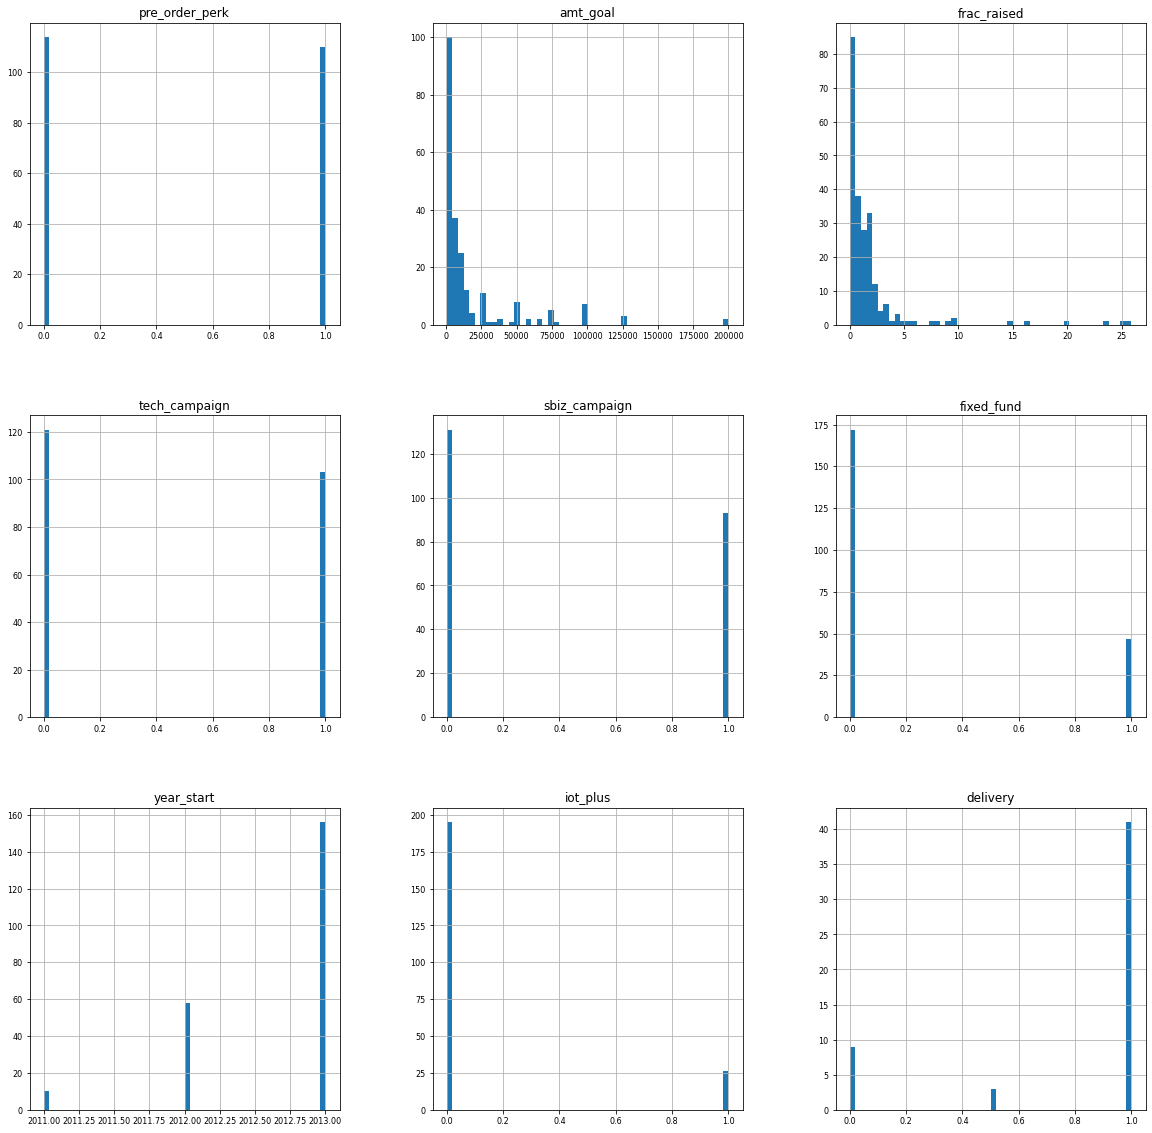

In [71]:
# Histograms
df_crowdfunding.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

<AxesSubplot:>

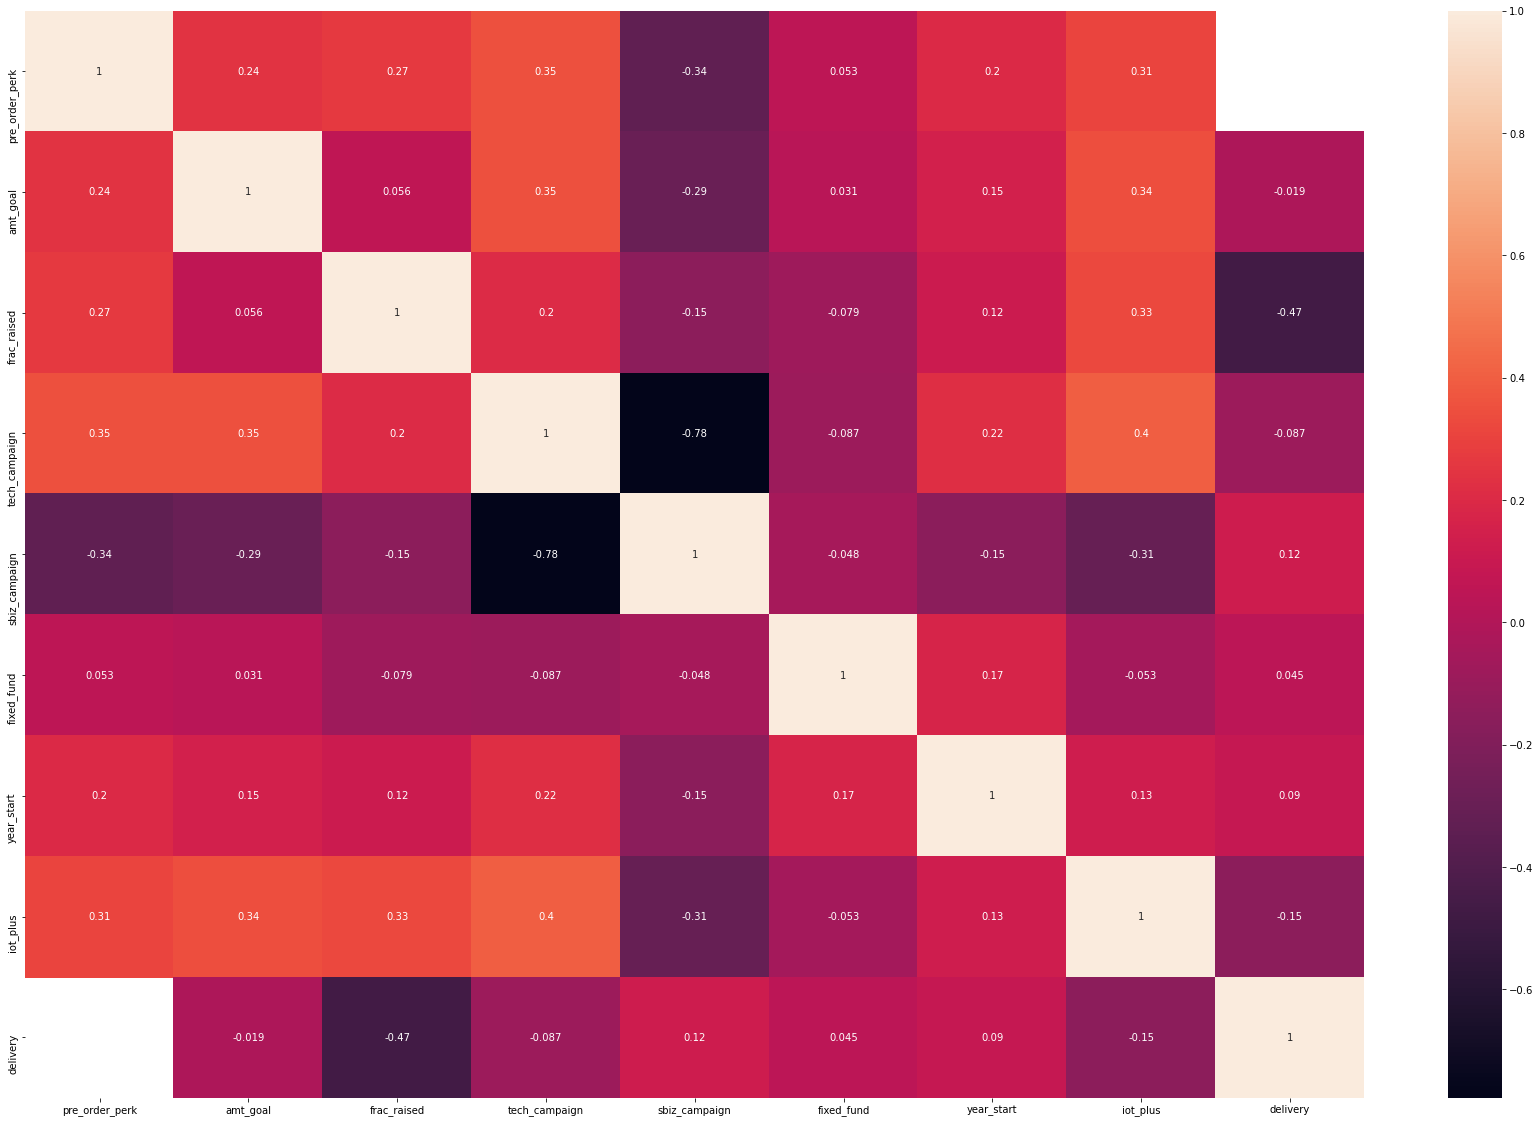

In [72]:
# Heat Map of the data
plt.figure(figsize = (30,20))
sns.heatmap(df_crowdfunding.corr(), annot = True)

In [73]:
target = df_crowdfunding.frac_raised
features = df_crowdfunding.drop(columns = ["frac_raised", 'amt_goal','delivery'])

In [74]:
target

0      0.040000
1      1.733333
2      1.007510
3      0.000000
4      1.000000
         ...   
219    1.088000
220    1.005000
221    1.007000
222    8.188500
223    0.000000
Name: frac_raised, Length: 224, dtype: float64

In [75]:
features

,pre_order_perk,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus
0,0,0,1,0.0,Kentucky,2011,0.0
1,0,0,0,0.0,Indiana,2012,0.0
2,1,1,0,0.0,Louisiana,2012,0.0
3,1,0,1,0.0,North Carolina,2012,0.0
4,1,0,1,0.0,Pennsylvania,2011,0.0
...,...,...,...,...,...,...,...
219,0,0,1,0.0,Illinois,2012,0.0
220,0,0,1,0.0,New York,2012,0.0
221,1,0,1,0.0,Kentucky,2012,0.0
222,1,1,0,0.0,Georgia,2013,0.0


In [ ]:
nums = df_crowdfunding.amt_goal
cats_enc = pd.get_dummies(cats)
full_feats = pd.concat([cats_enc, nums], axis = 1)
full_feats.dropna(inplace = True)
target = target.reindex_like(full_feats)
full_feats.shape